# Selection of minimum CORESET Size for a Given Target Block Probability

* In this notebook, we simulate a design problem in determining the minimum CORESET size needed for meeting a target blocking probability.


* Specifically, given the number of UEs and the coverage condition, BS can properly determine the CORESET size to ensure the blocking probability does not exceed a specified threshold.


* For evaluation, we consider the `medium coverage` condidtion where most of the UEs require medium ALs (i.e., AL 4), with AL distribution [0.05, 0.2, 0.5, 0.2, 0.05]

* The CORESET size must increase when more UEs are scheduled and a smaller blocking probability target.


* While a larger CORESET is beneficial for UE scheduling, it may not be desired from spectral and energy efficiency perspective, as more bandwith and more number of CCEs that a UE has to blindly look for. Therfore the network should properly select the CORESET size based on the requirements. So there is a trade off between CORESET size and target blocking probability.



## Python Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

import numpy      as np

## 5G-Toolkit Libraries

In [2]:
import sys
sys.path.append("../../")
from toolkit5G.Scheduler import PDCCHScheduler

## Simulation Parameters
The following parameters are used for this simulation:
- `coresetID` denotes the coreset ID.
- `slotNumber` denotes the slot-number carrying the PDCCH.
- `searchSpaceType` denotes the search space type. UE specific search space (USS) or Common search space (CSS).
- `nci` denotes the variable corresponding to carrier aggregation. Current simulation does not assume carrier aggregation.

In [3]:

mu                = np.random.randint(4)    # numerlogy for sub-carrier spacing
numSlotsPerFrame  = 2**mu * 10              # number of slots per radio frame
coresetID         = 1                       # coreset ID
slotNumber        = 0               
searchSpaceType   = "USS"                   # search space type. UE specific search space
nci               = 0                       # variable corresponding to carrier aggregation 
numIterations     = 1000


## PDCCH Scheduling Parameters
Following parameters are crucial for PDCCH scheduling performance:
- ``coresetSize`` denotes coreset size or number of CCEs available for scheduling UEs.
- ``strategy`` denotes the scheduling strategy.
- ``numCandidates`` denotes number of PDCCH candidates per each Aggregation Level (AL).
- ``aggLevelProbDistribution`` denotes the probability distribution with which an AL is choosen for a UE by the scheduler.

In [4]:
aggLevelProbDistribution = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
minCCEs                  = 20
maxCCEs                  = 135
coresetSize              = np.arange(minCCEs,maxCCEs+1,5)
numCandidates            = np.array([135,67,33,16,8], dtype=int)
strategy                 = "Conservative" 

pdcchSchedulerObj = PDCCHScheduler(mu, slotNumber, coresetID, nci)


## Compute minimum coreset size  for ``numUEs`` = 5.

In [5]:
################
# For 5 UEs
################

numUEs         = 5
rnti           = np.random.choice( np.arange(1,65519+1), size = (numUEs,), replace=False)

probOfBlocking = np.zeros((coresetSize.size,))
for n in range(coresetSize.size):    
    print("Simulating (n,numCCEs) : "+str(n)+", "+str(coresetSize[n]))    
    Nccep     = coresetSize[n]    
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs, aggLevelProbDistribution) 
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + (numBlockedUEs/numUEs)
    probOfBlocking[n] = prob/numIterations
    
targetBlockingProbability = 0.05
minCoresetSize5ForNumUEs5 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability  = 0.10
minCoresetSize10ForNumUEs5 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability  = 0.15
minCoresetSize15ForNumUEs5 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability  = 0.20
minCoresetSize20ForNumUEs5 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

Simulating (n,numCCEs) : 0, 20
Simulating (n,numCCEs) : 1, 25
Simulating (n,numCCEs) : 2, 30
Simulating (n,numCCEs) : 3, 35
Simulating (n,numCCEs) : 4, 40
Simulating (n,numCCEs) : 5, 45
Simulating (n,numCCEs) : 6, 50
Simulating (n,numCCEs) : 7, 55
Simulating (n,numCCEs) : 8, 60
Simulating (n,numCCEs) : 9, 65
Simulating (n,numCCEs) : 10, 70
Simulating (n,numCCEs) : 11, 75
Simulating (n,numCCEs) : 12, 80
Simulating (n,numCCEs) : 13, 85
Simulating (n,numCCEs) : 14, 90
Simulating (n,numCCEs) : 15, 95
Simulating (n,numCCEs) : 16, 100
Simulating (n,numCCEs) : 17, 105
Simulating (n,numCCEs) : 18, 110
Simulating (n,numCCEs) : 19, 115
Simulating (n,numCCEs) : 20, 120
Simulating (n,numCCEs) : 21, 125
Simulating (n,numCCEs) : 22, 130
Simulating (n,numCCEs) : 23, 135


## Compute minimum coreset size  for ``numUEs`` = 10.

In [6]:
################
# For 10 UEs
################

numUEs         = 10
rnti           = np.random.choice( np.arange(1,65519+1), size = (numUEs,), replace=False)

probOfBlocking = np.zeros((coresetSize.size,))
for n in range(coresetSize.shape[0]):    
    print("Simulating (n,numCCEs) : "+str(n)+", "+str(coresetSize[n]))    
    Nccep     = coresetSize[n]    
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs, aggLevelProbDistribution)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + (numBlockedUEs/numUEs)
    probOfBlocking[n] = prob/numIterations
    
targetBlockingProbability   = 0.05
minCoresetSize5ForNumUEs10  = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability   = 0.10
minCoresetSize10ForNumUEs10 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability   = 0.15
minCoresetSize15ForNumUEs10 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability   = 0.20
minCoresetSize20ForNumUEs10 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

Simulating (n,numCCEs) : 0, 20
Simulating (n,numCCEs) : 1, 25
Simulating (n,numCCEs) : 2, 30
Simulating (n,numCCEs) : 3, 35
Simulating (n,numCCEs) : 4, 40
Simulating (n,numCCEs) : 5, 45
Simulating (n,numCCEs) : 6, 50
Simulating (n,numCCEs) : 7, 55
Simulating (n,numCCEs) : 8, 60
Simulating (n,numCCEs) : 9, 65
Simulating (n,numCCEs) : 10, 70
Simulating (n,numCCEs) : 11, 75
Simulating (n,numCCEs) : 12, 80
Simulating (n,numCCEs) : 13, 85
Simulating (n,numCCEs) : 14, 90
Simulating (n,numCCEs) : 15, 95
Simulating (n,numCCEs) : 16, 100
Simulating (n,numCCEs) : 17, 105
Simulating (n,numCCEs) : 18, 110
Simulating (n,numCCEs) : 19, 115
Simulating (n,numCCEs) : 20, 120
Simulating (n,numCCEs) : 21, 125
Simulating (n,numCCEs) : 22, 130
Simulating (n,numCCEs) : 23, 135


## Compute minimum coreset size  for ``numUEs`` = 15.

In [7]:
################
# For 15 UEs
################

numUEs         = 15
rnti           = np.random.choice( np.arange(1,65519+1), size = (numUEs,), replace=False)

probOfBlocking = np.zeros((coresetSize.size,))
for n in range(coresetSize.shape[0]):    
    print("Simulating (n,numCCEs) : "+str(n)+", "+str(coresetSize[n]))    
    Nccep     = coresetSize[n]    
    prob      = 0
    for i in range(numIterations):
        ueALdistribution  = np.random.multinomial(numUEs, aggLevelProbDistribution) 
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs
    probOfBlocking[n] = prob/numIterations
    
targetBlockingProbability   = 0.05
minCoresetSize5ForNumUEs15  = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability   = 0.10
minCoresetSize10ForNumUEs15 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability   = 0.15
minCoresetSize15ForNumUEs15 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

targetBlockingProbability   = 0.20
minCoresetSize20ForNumUEs15 = coresetSize[np.where(probOfBlocking<=targetBlockingProbability)[0][0]]

Simulating (n,numCCEs) : 0, 20
Simulating (n,numCCEs) : 1, 25
Simulating (n,numCCEs) : 2, 30
Simulating (n,numCCEs) : 3, 35
Simulating (n,numCCEs) : 4, 40
Simulating (n,numCCEs) : 5, 45
Simulating (n,numCCEs) : 6, 50
Simulating (n,numCCEs) : 7, 55
Simulating (n,numCCEs) : 8, 60
Simulating (n,numCCEs) : 9, 65
Simulating (n,numCCEs) : 10, 70
Simulating (n,numCCEs) : 11, 75
Simulating (n,numCCEs) : 12, 80
Simulating (n,numCCEs) : 13, 85
Simulating (n,numCCEs) : 14, 90
Simulating (n,numCCEs) : 15, 95
Simulating (n,numCCEs) : 16, 100
Simulating (n,numCCEs) : 17, 105
Simulating (n,numCCEs) : 18, 110
Simulating (n,numCCEs) : 19, 115
Simulating (n,numCCEs) : 20, 120
Simulating (n,numCCEs) : 21, 125
Simulating (n,numCCEs) : 22, 130
Simulating (n,numCCEs) : 23, 135


## Display Minimum CORESET size required to meet the Target Blocking Probability for different number of UEs.

* Its the recreation of ``Fig. 11. Minimum required CORESET size for different number of UEs and blocking probability requirements`` from the reference paper referenced below [1].

* Figure shows that the minimum required CORESET size for 5, 10, 15 UEs and different blocking probability targets of 5%. 10%, 15% and 20%.

* Cleary, we see that the CORESET size increases when more UEs are scheduled and a smaller blocking probability target. For instance, comparing two cases:
    * case-1: 5 UEs and 20% blocking probability target
    * case-2: 10 UEs and 15% blocking probability target
* It shows that CORESET size for case-2 needs 3 times larger than that of case-1 (i.e. from 25 CCEs to 75 CCEs).   

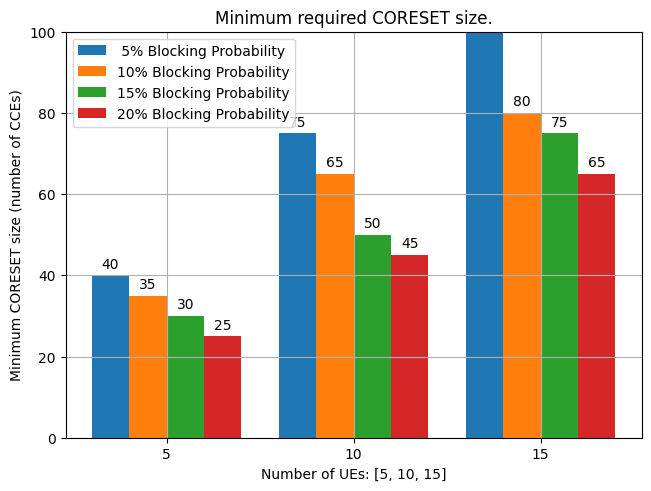

In [8]:

species = ("5", "10", "15")
penguin_means = {' 5% Blocking Probability' : (minCoresetSize5ForNumUEs5,  minCoresetSize5ForNumUEs10,  minCoresetSize5ForNumUEs15),
                 '10% Blocking Probability': (minCoresetSize10ForNumUEs5, minCoresetSize10ForNumUEs10, minCoresetSize10ForNumUEs15),
                 '15% Blocking Probability': (minCoresetSize15ForNumUEs5, minCoresetSize15ForNumUEs10, minCoresetSize15ForNumUEs15),
                 '20% Blocking Probability': (minCoresetSize20ForNumUEs5, minCoresetSize20ForNumUEs10, minCoresetSize20ForNumUEs15)}

x          = np.array([3,8,13]) # the label locations
width      = 1                    # the width of the bars
multiplier = 1

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Minimum CORESET size (number of CCEs)')
ax.set_xlabel('Number of UEs: [5, 10, 15]')
ax.set_title('Minimum required CORESET size.')
ax.set_xticks(x+2.5, species)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 100)
ax.grid()
plt.show()

### References

[1] `Blocking Probability Analysis for 5G New Radio (NR) Physical Downlink Control Channel`. Mohammad Mozaffari,
      Y.-P. Eric Wang, and Kittipong Kittichokechai